In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"preetham20","key":"3e431ac14a45439e77cbffab0ee12826"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d aubird/au-bird-scene-photo-collection


Dataset URL: https://www.kaggle.com/datasets/aubird/au-bird-scene-photo-collection
License(s): copyright-authors
100% 17.8G/17.8G [03:46<00:00, 141MB/s]
100% 17.8G/17.8G [03:46<00:00, 84.2MB/s]


In [ ]:
!unzip au-bird-scene-photo-collection.zip -d /content/au_bird_dataset


Archive:  au-bird-scene-photo-collection.zip
  inflating: /content/au_bird_dataset/AUbirds/Readme.txt  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/SONBAHAR/IMG_9564.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/FW0A3928.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/FW0A5338.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/IMG_3910.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/IMG_3943.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/IMG_4318.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/IMG_4511.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/IMG_4547.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/IMG_4589.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/IMG_4636.JPG  
  inflating: /content/au_bird_dataset/AUbirds/all/G1/─░LKBAHAR/IMG_4655.JPG  
  inflating: /content/au_bird_dataset/A

In [ ]:
!pip install ultralytics
!pip install xmltodict


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import os
import xml.etree.ElementTree as ET



dataset_path = "/content/au_bird_dataset/AUbirds"
train_path = os.path.join(dataset_path, "train")
test_path = os.path.join(dataset_path, "test")



class_dict = {"bird": 0}

def convert_voc_to_yolo(xml_path, img_width, img_height):
    tree = ET.parse(xml_path)
    root = tree.getroot()
    yolo_data = []

    for obj in root.findall("object"):
        class_name = obj.find("name").text
        if class_name not in class_dict:
            continue

        class_id = class_dict[class_name]
        bbox = obj.find("bndbox")
        xmin, ymin, xmax, ymax = [int(bbox.find(tag).text) for tag in ["xmin", "ymin", "xmax", "ymax"]]


        x_center = ((xmin + xmax) / 2) / img_width
        y_center = ((ymin + ymax) / 2) / img_height
        width = (xmax - xmin) / img_width
        height = (ymax - ymin) / img_height

        yolo_data.append(f"{class_id} {x_center} {y_center} {width} {height}")

    return yolo_data

for folder in ["train", "test"]:
    images_path = os.path.join(dataset_path, folder)
    labels_path = os.path.join(images_path, "labels")
    os.makedirs(labels_path, exist_ok=True)

    for file in os.listdir(images_path):
        if file.endswith(".xml"):
            xml_file = os.path.join(images_path, file)
            img_file = xml_file.replace(".xml", ".jpg")

            if not os.path.exists(img_file):
                print(f"Skipping {file} as corresponding image is missing.")
                continue


            tree = ET.parse(xml_file)
            root = tree.getroot()
            img_width = int(root.find("size/width").text)
            img_height = int(root.find("size/height").text)


            yolo_annotations = convert_voc_to_yolo(xml_file, img_width, img_height)
            yolo_label_file = os.path.join(labels_path, file.replace(".xml", ".txt"))


            with open(yolo_label_file, "w") as f:
                f.write("\n".join(yolo_annotations))

print("Conversion to YOLO format completed successfully!")


Conversion to YOLO format completed successfully!


In [ ]:
data_yaml_path = "/content/au_bird_dataset/AUbirds/data.yaml"

yaml_content = """train: /content/au_bird_dataset/AUbirds/train/images
val: /content/au_bird_dataset/AUbirds/test/images
nc: 1
names: ["bird"]
"""


with open(data_yaml_path, "w") as f:
    f.write(yaml_content)

print(f"data.yaml created at {data_yaml_path}")


data.yaml created at /content/au_bird_dataset/AUbirds/data.yaml


In [ ]:
!cat /content/au_bird_dataset/AUbirds/data.yaml


train: /content/au_bird_dataset/AUbirds/train/images
val: /content/au_bird_dataset/AUbirds/test/images
nc: 1
names: ["bird"]


In [ ]:
import shutil

for folder in ["train", "test"]:
    images_path = os.path.join(dataset_path, folder)
    labels_path = os.path.join(images_path, "labels")
    images_new_path = os.path.join(images_path, "images")
    os.makedirs(images_new_path, exist_ok=True)

    for file in os.listdir(images_path):
        if file.endswith(".jpg"):
            shutil.move(os.path.join(images_path, file), images_new_path)


In [ ]:
import os

print("Train Images:", os.listdir("/content/au_bird_dataset/AUbirds/train/images")[:5])
print("Train Labels:", os.listdir("/content/au_bird_dataset/AUbirds/train/labels")[:5])
print("Test Images:", os.listdir("/content/au_bird_dataset/AUbirds/test/images")[:5])
print("Test Labels:", os.listdir("/content/au_bird_dataset/AUbirds/test/labels")[:5])


Train Images: ['284.jpg', '349.jpg', '33.jpg', '265.jpg', '186.jpg']
Train Labels: ['147.txt', '478.txt', '223.txt', '427.txt', '486.txt']
Test Images: ['33.jpg', '122.jpg', '68.jpg', '148.jpg', '123.jpg']
Test Labels: ['147.txt', '6.txt', '60.txt', '107.txt', '24.txt']


In [ ]:
!cat /content/au_bird_dataset/AUbirds/data.yaml


train: /content/au_bird_dataset/AUbirds/train/images
val: /content/au_bird_dataset/AUbirds/test/images
nc: 1
names: ["bird"]


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model.train(data="/content/au_bird_dataset/AUbirds/data.yaml", epochs=75, imgsz=640, batch=8)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 130MB/s]


Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/au_bird_dataset/AUbirds/data.yaml, epochs=75, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

100%|██████████| 755k/755k [00:00<00:00, 20.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 112MB/s]


AMP: checks passed ✅


train: Scanning /content/au_bird_dataset/AUbirds/train/labels... 487 images, 8 backgrounds, 0 corrupt: 100%|██████████| 495/495 [00:01<00:00, 318.31it/s]

train: New cache created: /content/au_bird_dataset/AUbirds/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/au_bird_dataset/AUbirds/test/labels... 156 images, 0 backgrounds, 0 corrupt: 100%|██████████| 156/156 [00:00<00:00, 233.78it/s]

val: New cache created: /content/au_bird_dataset/AUbirds/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      1.24G      1.349      1.722      1.126         88        640: 100%|██████████| 62/62 [00:13<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.19it/s]

                   all        156       1602      0.772      0.154      0.343      0.219



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      1.16G      1.351      1.224      1.142         43        640: 100%|██████████| 62/62 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.51it/s]

                   all        156       1602      0.714      0.701      0.684      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      1.16G      1.352      1.218      1.184         68        640: 100%|██████████| 62/62 [00:11<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]

                   all        156       1602      0.774      0.743      0.808      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      1.19G      1.373      1.129      1.166         67        640: 100%|██████████| 62/62 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]

                   all        156       1602      0.816      0.811       0.85      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75       1.2G      1.341      1.047      1.139         65        640: 100%|██████████| 62/62 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.93it/s]

                   all        156       1602      0.776       0.84      0.861      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      1.16G       1.32     0.9798      1.123         91        640: 100%|██████████| 62/62 [00:10<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.45it/s]

                   all        156       1602      0.896        0.8      0.879      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      1.16G      1.262     0.9311      1.116         67        640: 100%|██████████| 62/62 [00:10<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.01it/s]

                   all        156       1602      0.893      0.823      0.897      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      1.16G      1.247     0.9064      1.105         58        640: 100%|██████████| 62/62 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.07it/s]


                   all        156       1602      0.892      0.801      0.886      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      1.17G      1.258     0.8731      1.095        137        640: 100%|██████████| 62/62 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]

                   all        156       1602      0.884      0.865      0.919      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      1.23G      1.241     0.8485       1.11        144        640: 100%|██████████| 62/62 [00:11<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.06it/s]

                   all        156       1602      0.908      0.866      0.931      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75       1.2G      1.239     0.8324      1.104         99        640: 100%|██████████| 62/62 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]


                   all        156       1602      0.866       0.86      0.913      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75       1.2G      1.223     0.8375      1.096        109        640: 100%|██████████| 62/62 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.24it/s]

                   all        156       1602      0.893      0.863      0.924      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      1.16G      1.242     0.8405      1.105        158        640: 100%|██████████| 62/62 [00:11<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.03it/s]


                   all        156       1602      0.909      0.826      0.905      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75       1.2G      1.204     0.8168      1.086         65        640: 100%|██████████| 62/62 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]


                   all        156       1602      0.918      0.887      0.942      0.619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      1.21G      1.203     0.8059      1.068         93        640: 100%|██████████| 62/62 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.38it/s]

                   all        156       1602      0.918      0.886      0.947      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      1.15G      1.197     0.7945      1.077        112        640: 100%|██████████| 62/62 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.02it/s]

                   all        156       1602      0.912        0.9      0.947      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      1.15G      1.156     0.7623      1.077         68        640: 100%|██████████| 62/62 [00:10<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.64it/s]

                   all        156       1602      0.911      0.878      0.938      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      1.21G      1.173     0.7671      1.067         76        640: 100%|██████████| 62/62 [00:10<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.56it/s]

                   all        156       1602      0.912      0.877      0.942      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      1.12G      1.196     0.7388      1.052         72        640: 100%|██████████| 62/62 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.03it/s]

                   all        156       1602      0.923      0.894       0.94      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75       1.2G      1.175     0.7336      1.058         66        640: 100%|██████████| 62/62 [00:11<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.06it/s]

                   all        156       1602      0.932      0.903      0.948      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      1.15G       1.14     0.7075      1.049         82        640: 100%|██████████| 62/62 [00:11<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.40it/s]

                   all        156       1602      0.926      0.901      0.945      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      1.18G      1.143     0.7194      1.047         84        640: 100%|██████████| 62/62 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.94it/s]

                   all        156       1602      0.918      0.879       0.94      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      1.36G      1.146     0.7104      1.057         65        640: 100%|██████████| 62/62 [00:11<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.15it/s]

                   all        156       1602       0.94      0.889      0.947      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      1.19G      1.137     0.6854      1.046         64        640: 100%|██████████| 62/62 [00:11<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.41it/s]

                   all        156       1602      0.924      0.903      0.948      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      1.16G      1.114     0.6704      1.033         65        640: 100%|██████████| 62/62 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.42it/s]

                   all        156       1602      0.932      0.902      0.955      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75       1.1G      1.135     0.6899      1.046         80        640: 100%|██████████| 62/62 [00:11<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.33it/s]

                   all        156       1602      0.935      0.904      0.955      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      1.16G      1.108     0.6681      1.035        104        640: 100%|██████████| 62/62 [00:12<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.44it/s]

                   all        156       1602      0.942      0.903      0.949       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      1.23G      1.115     0.6813      1.047         81        640: 100%|██████████| 62/62 [00:11<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.09it/s]

                   all        156       1602      0.937      0.918      0.957      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      1.15G      1.096     0.6653      1.034         54        640: 100%|██████████| 62/62 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]


                   all        156       1602      0.934      0.907      0.955      0.659

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      1.21G      1.095     0.6564      1.034         52        640: 100%|██████████| 62/62 [00:11<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.46it/s]

                   all        156       1602      0.942      0.917      0.957      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      1.12G      1.098     0.6589      1.017         66        640: 100%|██████████| 62/62 [00:11<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.08it/s]

                   all        156       1602      0.937      0.923      0.959      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      1.16G      1.102     0.6515      1.026         87        640: 100%|██████████| 62/62 [00:11<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.43it/s]

                   all        156       1602      0.934       0.91      0.961      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      1.11G      1.094     0.6563      1.033         73        640: 100%|██████████| 62/62 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.89it/s]

                   all        156       1602      0.945      0.907      0.956      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      1.26G      1.084     0.6401      1.019         76        640: 100%|██████████| 62/62 [00:11<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.93it/s]

                   all        156       1602      0.941      0.917      0.956      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      1.21G      1.059     0.6242      1.021         52        640: 100%|██████████| 62/62 [00:11<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.40it/s]

                   all        156       1602      0.938      0.907       0.96       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      1.19G      1.068     0.6324      1.013        106        640: 100%|██████████| 62/62 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.62it/s]

                   all        156       1602      0.936      0.921      0.956      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      1.21G      1.051     0.6105      0.996         96        640: 100%|██████████| 62/62 [00:11<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.29it/s]

                   all        156       1602      0.945      0.911      0.956      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      1.21G      1.044     0.6208       1.02         84        640: 100%|██████████| 62/62 [00:11<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.39it/s]

                   all        156       1602      0.932      0.915      0.962      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      1.16G      1.046     0.6069      1.011        101        640: 100%|██████████| 62/62 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.89it/s]

                   all        156       1602      0.936      0.919      0.956      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      1.21G      1.045     0.6132      1.007         92        640: 100%|██████████| 62/62 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.94it/s]

                   all        156       1602      0.934      0.935      0.965      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      1.18G      1.018     0.5995     0.9983         92        640: 100%|██████████| 62/62 [00:11<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.36it/s]

                   all        156       1602       0.96      0.926      0.967      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      1.15G      1.042     0.6067      1.011         48        640: 100%|██████████| 62/62 [00:11<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.94it/s]

                   all        156       1602      0.947      0.922      0.962      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      1.16G      1.052     0.6146      1.018         59        640: 100%|██████████| 62/62 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.21it/s]

                   all        156       1602      0.941      0.933      0.964       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      1.16G      1.041     0.6051          1         72        640: 100%|██████████| 62/62 [00:11<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.22it/s]

                   all        156       1602      0.949      0.926      0.964      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      1.17G      1.037     0.5991          1         66        640: 100%|██████████| 62/62 [00:11<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.44it/s]

                   all        156       1602      0.961      0.911      0.965      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      1.23G       1.03     0.5828      0.994         65        640: 100%|██████████| 62/62 [00:11<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.62it/s]

                   all        156       1602      0.952      0.933      0.966      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      1.16G      1.016     0.5831     0.9859         99        640: 100%|██████████| 62/62 [00:11<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.27it/s]

                   all        156       1602      0.948       0.93      0.967      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      1.12G     0.9919     0.5652     0.9896         77        640: 100%|██████████| 62/62 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.01it/s]

                   all        156       1602      0.959      0.935      0.969      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      1.17G     0.9953     0.5637     0.9919         61        640: 100%|██████████| 62/62 [00:11<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.97it/s]

                   all        156       1602      0.954      0.928       0.97      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      1.15G      0.989     0.5586      0.987         86        640: 100%|██████████| 62/62 [00:11<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.59it/s]

                   all        156       1602      0.949      0.927      0.964      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      1.15G     0.9922     0.5591     0.9758        140        640: 100%|██████████| 62/62 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.45it/s]

                   all        156       1602      0.953      0.927      0.973      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75       1.2G      0.997      0.562      0.987         74        640: 100%|██████████| 62/62 [00:10<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]

                   all        156       1602      0.949      0.936      0.971      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75       1.2G       1.01      0.565     0.9937         99        640: 100%|██████████| 62/62 [00:11<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.23it/s]

                   all        156       1602      0.949      0.938      0.971      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      1.15G      1.006     0.5744     0.9889         56        640: 100%|██████████| 62/62 [00:11<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.12it/s]


                   all        156       1602      0.944      0.941      0.971      0.678

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      1.16G     0.9942     0.5644     0.9906        103        640: 100%|██████████| 62/62 [00:11<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.24it/s]

                   all        156       1602      0.942      0.939      0.971      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      1.15G     0.9667     0.5487     0.9778         72        640: 100%|██████████| 62/62 [00:11<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.36it/s]

                   all        156       1602      0.954      0.944      0.968      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75       1.2G     0.9908     0.5414     0.9687         69        640: 100%|██████████| 62/62 [00:11<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.23it/s]

                   all        156       1602      0.949      0.948      0.971      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      1.17G     0.9747     0.5392     0.9721         74        640: 100%|██████████| 62/62 [00:11<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.07it/s]


                   all        156       1602      0.956      0.929      0.972      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      1.27G     0.9799     0.5412     0.9748         75        640: 100%|██████████| 62/62 [00:11<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.50it/s]


                   all        156       1602      0.949      0.945      0.971       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      1.15G     0.9399     0.5264      0.968        149        640: 100%|██████████| 62/62 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.74it/s]

                   all        156       1602      0.942      0.939      0.972      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      1.14G     0.9444       0.52     0.9713         64        640: 100%|██████████| 62/62 [00:11<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.20it/s]

                   all        156       1602      0.955      0.934      0.972       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      1.29G       0.95     0.5289     0.9665         83        640: 100%|██████████| 62/62 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.70it/s]


                   all        156       1602      0.952      0.938      0.974      0.693

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      1.22G     0.9465     0.5206      0.959         57        640: 100%|██████████| 62/62 [00:10<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]

                   all        156       1602      0.953      0.937      0.971      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75       1.2G     0.9355     0.5376     0.9685         62        640: 100%|██████████| 62/62 [00:11<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.15it/s]

                   all        156       1602      0.954      0.943      0.968      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      1.21G     0.9401     0.5223     0.9582        127        640: 100%|██████████| 62/62 [00:11<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.10it/s]


                   all        156       1602      0.953      0.928      0.972      0.689
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      1.11G     0.9235     0.4952     0.9451         58        640: 100%|██████████| 62/62 [00:12<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.63it/s]

                   all        156       1602      0.943      0.944       0.97       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      1.09G     0.9071     0.4699     0.9386         36        640: 100%|██████████| 62/62 [00:11<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.33it/s]

                   all        156       1602      0.954      0.941      0.973      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75       1.1G     0.9044     0.4606     0.9378         54        640: 100%|██████████| 62/62 [00:11<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.29it/s]

                   all        156       1602       0.96      0.937      0.974      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75       1.1G     0.8888     0.4637     0.9297         33        640: 100%|██████████| 62/62 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.27it/s]

                   all        156       1602      0.955      0.935      0.973      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      1.11G     0.8817     0.4563     0.9265         46        640: 100%|██████████| 62/62 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  5.92it/s]


                   all        156       1602      0.954      0.941      0.973      0.688

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      1.08G      0.884     0.4661     0.9276         34        640: 100%|██████████| 62/62 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.33it/s]

                   all        156       1602      0.956      0.942      0.972      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      1.11G     0.8747     0.4509     0.9232         48        640: 100%|██████████| 62/62 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.24it/s]

                   all        156       1602       0.96      0.939      0.971      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      1.11G     0.8685     0.4452     0.9213         36        640: 100%|██████████| 62/62 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:01<00:00,  6.14it/s]


                   all        156       1602      0.958      0.936      0.971      0.695

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75       1.1G     0.8671     0.4426     0.9278         34        640: 100%|██████████| 62/62 [00:10<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.43it/s]

                   all        156       1602      0.958      0.939      0.972      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75       1.1G     0.8781     0.4528     0.9162         21        640: 100%|██████████| 62/62 [00:10<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.95it/s]

                   all        156       1602      0.958      0.941      0.973      0.695



75 epochs completed in 0.294 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.86 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]


                   all        156       1602      0.959      0.942      0.973      0.695
Speed: 0.3ms preprocess, 2.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4021728bd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
from ultralytics import YOLO


model = YOLO("/content/runs/detect/train/weights/best.pt")


results = model.predict(source="/content/au_bird_dataset/AUbirds/test/images", save=True)



image 1/156 /content/au_bird_dataset/AUbirds/test/images/1.jpg: 384x640 10 birds, 37.7ms
image 2/156 /content/au_bird_dataset/AUbirds/test/images/10.jpg: 384x640 9 birds, 11.4ms
image 3/156 /content/au_bird_dataset/AUbirds/test/images/100.jpg: 384x640 2 birds, 7.6ms
image 4/156 /content/au_bird_dataset/AUbirds/test/images/101.jpg: 384x640 17 birds, 7.0ms
image 5/156 /content/au_bird_dataset/AUbirds/test/images/102.jpg: 384x640 4 birds, 7.6ms
image 6/156 /content/au_bird_dataset/AUbirds/test/images/103.jpg: 384x640 3 birds, 7.5ms
image 7/156 /content/au_bird_dataset/AUbirds/test/images/104.jpg: 384x640 6 birds, 7.4ms
image 8/156 /content/au_bird_dataset/AUbirds/test/images/105.jpg: 384x640 8 birds, 6.8ms
image 9/156 /content/au_bird_dataset/AUbirds/test/images/106.jpg: 384x640 18 birds, 6.2ms
image 10/156 /content/au_bird_dataset/AUbirds/test/images/107.jpg: 384x640 3 birds, 6.5ms
image 11/156 /content/au_bird_dataset/AUbirds/test/images/108.jpg: 384x640 4 birds, 7.6ms
image 12/156 /co

In [ ]:

from google.colab import files

uploaded = files.upload()


Saving test_final.webp to test_final.webp


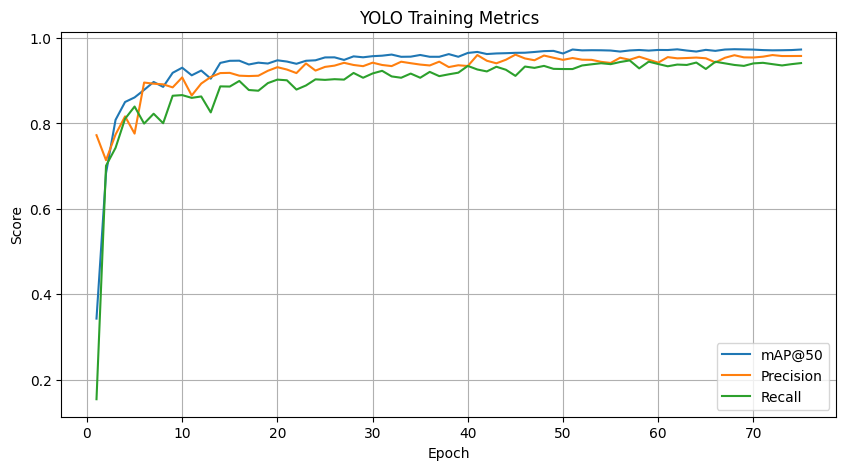

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


results_path = "/content/runs/detect/train/results.csv"
df = pd.read_csv(results_path)

plt.figure(figsize=(10, 5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@50')
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('YOLO Training Metrics')
plt.legend()
plt.grid()
plt.show()



image 1/1 /content/M2.jpeg: 544x640 134 birds, 44.5ms
Speed: 4.9ms preprocess, 44.5ms inference, 1.7ms postprocess per image at shape (1, 3, 544, 640)
Results saved to runs/detect/predict
134


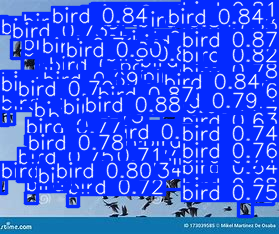

In [ ]:
results2 = model.predict(source="/content/M2.jpeg", save=True)


print(len(results2[0].boxes))
results2[0].show()



image 1/1 /content/M3.jpeg: 480x640 5 birds, 10.8ms
Speed: 4.7ms preprocess, 10.8ms inference, 2.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
5


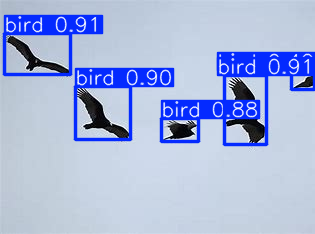

In [ ]:
results3 = model.predict(source="/content/M3.jpeg", save=True)


print(len(results3[0].boxes))
results3[0].show()



image 1/1 /content/sky.jpeg: 480x640 (no detections), 10.8ms
Speed: 4.4ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
0


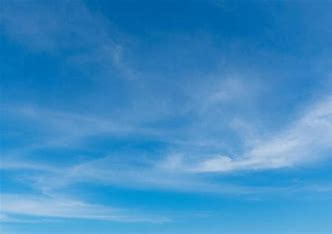

In [ ]:
results4= model.predict(source="/content/sky.jpeg", save=True)


print(len(results4[0].boxes))
results4[0].show()


image 1/1 /content/good.jpg: 448x640 18 birds, 8.0ms
Speed: 3.1ms preprocess, 8.0ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
18


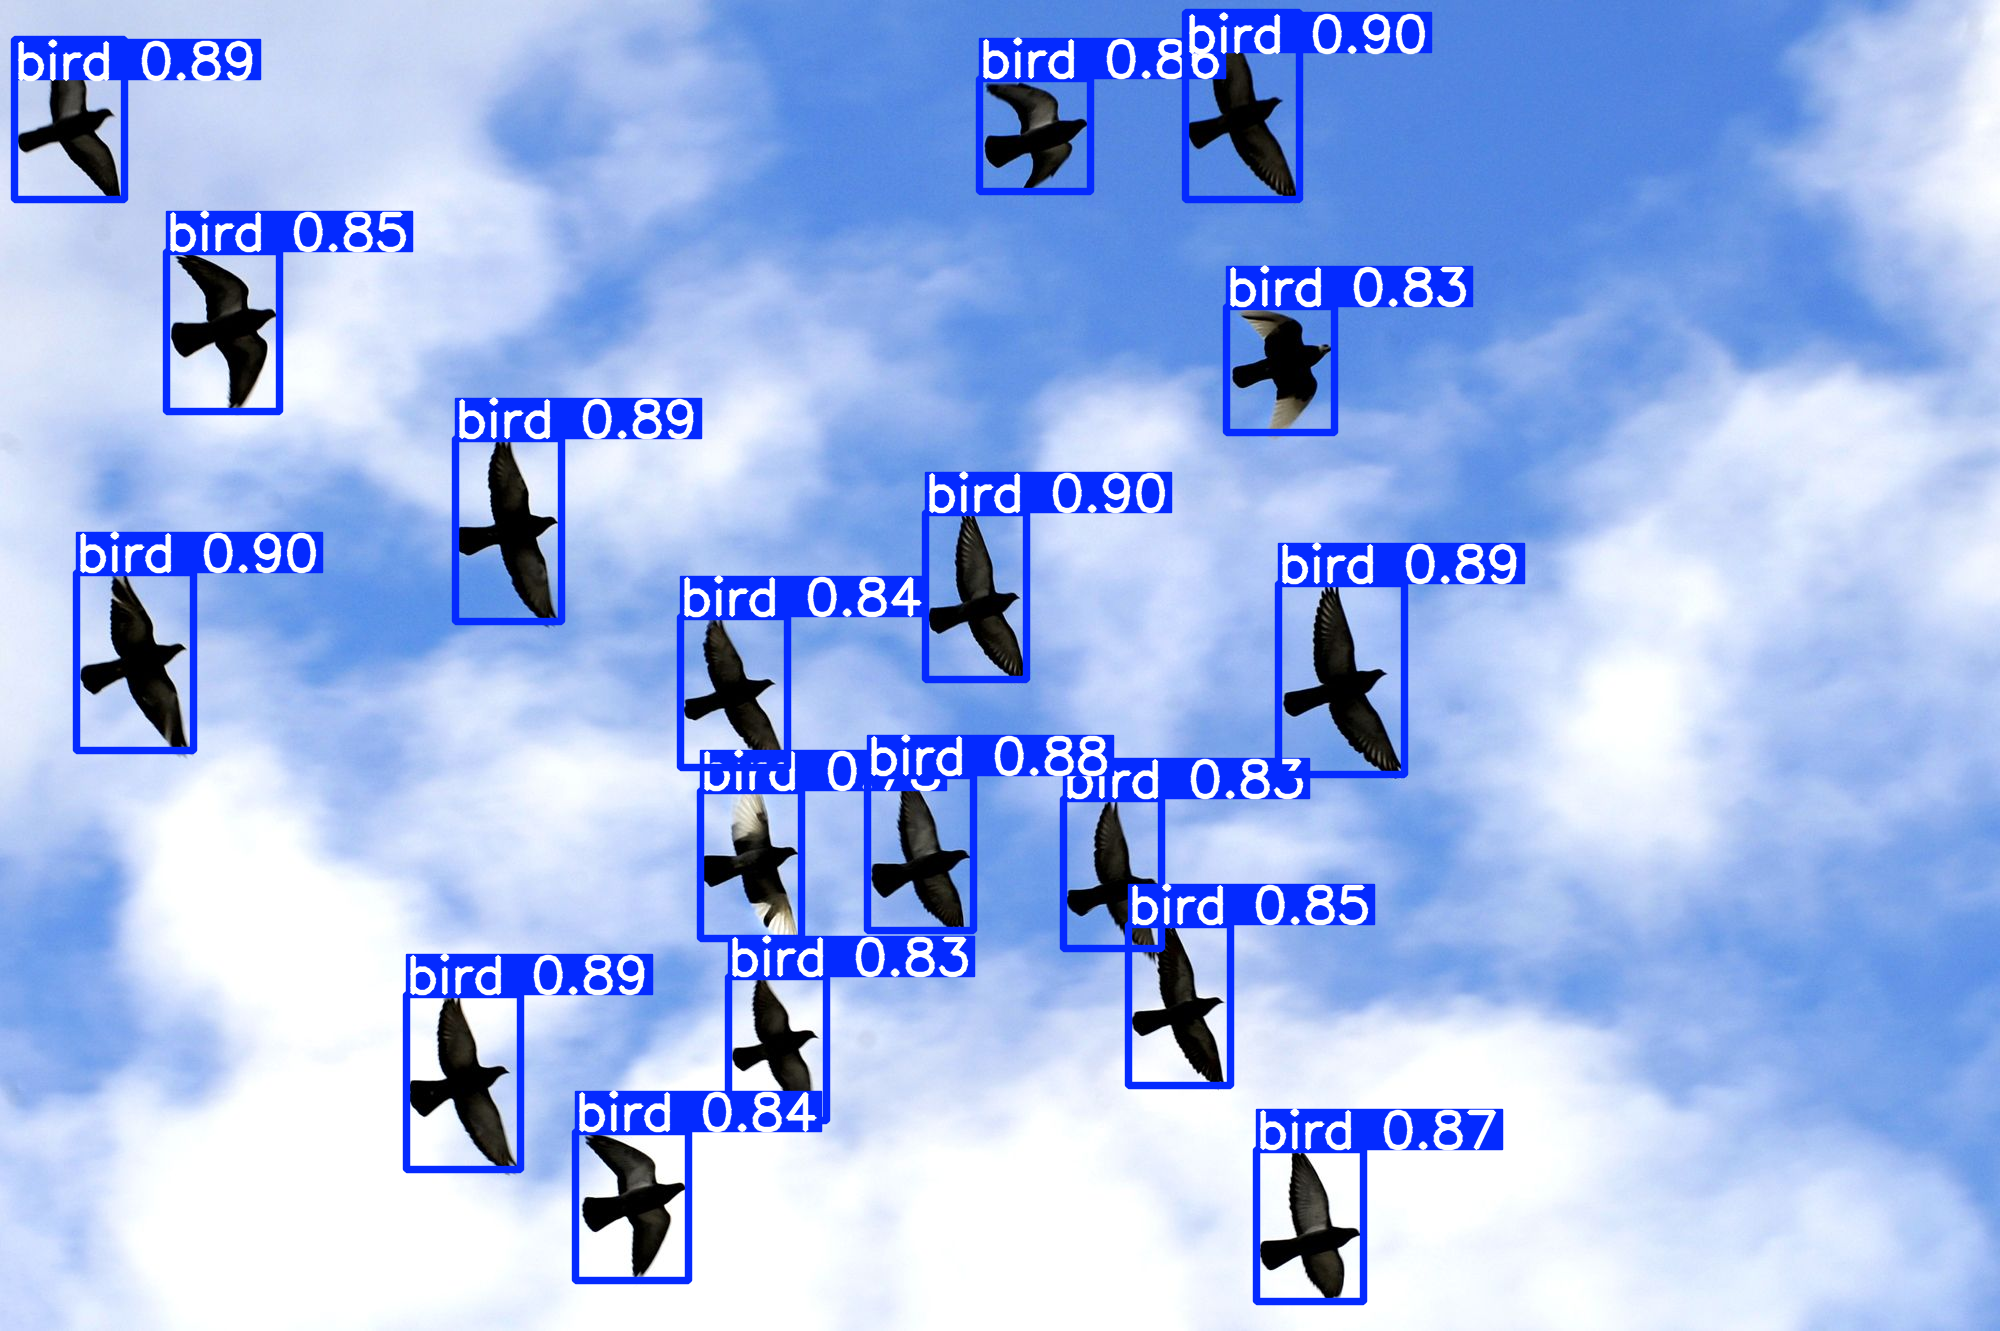

In [ ]:
results4= model.predict(source="/content/good.jpg", save=True)


print(len(results4[0].boxes))
results4[0].show()